In [ ]:
# Kmeans clustering: group clusters the data observations with similar properties.

In [2]:
import pandas as pd
import numpy as np

# %<%hjjjte3253

In [6]:
retail=pd.read_csv('OnlineRetail.csv',encoding='unicode_escape')

In [7]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
retail.shape

(541909, 8)

In [11]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
# Step 2: Data Cleaning

# Identification Missing Value.

retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Best way ---> customerID---> Drop the Missing values (records).
retail=retail.dropna()


In [15]:
retail.shape

(406829, 8)

In [18]:
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [19]:
# conversion of customer _id from numeric to object.
retail.loc[:,'CustomerID']=retail.loc[:,'CustomerID'].astype(str)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [ ]:
# DATA PREPARATION:  RFM Technique or Customer Segmentation Technique.

In [ ]:
# R(Recency) :Number of days since the last purchase of the customer.

# F(Frequency):Number of transactions of the customer.

# M(Monetary):Total amount of transaction .(revenue contributed by the each customer.)

In [22]:
# Monetary.

retail['Amount']=retail['Quantity']*retail['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [25]:
rfm_m=retail.groupby('CustomerID')['Amount'].sum()  # Grouping the Amount with respect to the Customer ID an Applying the sum.

In [28]:
len(retail['CustomerID'].unique())

4372

In [26]:
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [29]:
m=pd.DataFrame(rfm_m)  # Converted the data into the Dataframe.

In [31]:
m.reset_index(inplace=True)

In [32]:
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [43]:
# Calculate the frequency.

# Calcualting the count of invoices with customer---> frequencty???

rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()

In [42]:
rfm_f

4372

In [49]:
retail[retail['CustomerID']=='12347.0']['InvoiceNo'].unique()  # extrcating out the unique count of invoices.

array(['537626', '542237', '549222', '556201', '562032', '573511',
       '581180'], dtype=object)

In [63]:
 rfm_f=retail.groupby(['CustomerID','InvoiceNo']).size().groupby(level=0).count()


In [57]:
rfm_f

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Length: 4372, dtype: int64

In [60]:
Alt_f=retail.groupby('CustomerID')['InvoiceNo'].nunique()

In [61]:
Alt_f

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

In [64]:
f=pd.DataFrame(Alt_f,)

In [65]:
f.reset_index(inplace=True)

In [66]:
f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [69]:
f.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [70]:
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [71]:
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [73]:
# Recency 

# change the Date format from object to date and time.

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'],format='%m/%d/%Y %H:%M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [77]:
retail['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [75]:
max_date=max(retail['InvoiceDate'])

In [76]:
max_date

Timestamp('2011-12-09 12:50:00')

In [78]:
retail['diff']=max_date-retail['InvoiceDate']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [80]:
rfm_r=retail.groupby('CustomerID')['diff'].min()

In [81]:
rfm_r.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: diff, dtype: timedelta64[ns]

In [82]:
r=pd.DataFrame(rfm_r)
r.reset_index(inplace=True)

In [83]:
r.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [84]:
r['diff']=r['diff'].dt.days

In [85]:
r.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [86]:
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [87]:
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [88]:
rf1=pd.merge(m,f,on='CustomerID',how='inner')  # monetary and frequency

In [89]:
rf1.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [90]:
final_data=pd.merge(rf1,r,on='CustomerID',how='inner')

In [91]:
final_data.head()

,CustomerID,Amount,Frequency,diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


In [92]:
final_data.describe()

,Amount,Frequency,diff
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,5.075480,91.047118
std,8219.345141,9.338754,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,1.000000,16.000000
50%,648.075000,3.000000,49.000000
75%,1611.725000,5.000000,142.000000
max,279489.020000,248.000000,373.000000


In [93]:
# Scaling of the Data. uniform ranges of values ---> Mean =0, Std= 1

from sklearn.preprocessing import StandardScaler

In [94]:
rfm_df=final_data[['Amount','Frequency','diff']]

In [95]:
sky=StandardScaler()

In [96]:
rfm_scaled=sky.fit_transform(rfm_df)

In [99]:
rfm_scaled

array([[-0.23100099, -0.32936215,  2.32202285],
       [ 0.29343167,  0.20610242, -0.89373323],
       [-0.01231622, -0.11517632, -0.1691956 ],
       ...,
       [-0.20951263, -0.22226923, -0.83418219],
       [ 0.02390005,  1.16993863, -0.87388289],
       [-0.00744423, -0.22226923, -0.48680114]])

In [100]:
rfm_scaled=pd.DataFrame(rfm_scaled)

In [101]:
rfm_scaled.columns=['Amount','Frequency','diff']

In [102]:
rfm_scaled

,Amount,Frequency,diff
0,-0.231001,-0.329362,2.322023
1,0.293432,0.206102,-0.893733
2,-0.012316,-0.115176,-0.169196
3,-0.017146,-0.436455,-0.725005
4,-0.190312,-0.436455,2.163220
...,...,...,...
4367,-0.209026,-0.436455,1.845615
4368,-0.221167,-0.436455,0.882873
4369,-0.209513,-0.222269,-0.834182
4370,0.023900,1.169939,-0.873883


In [104]:
from sklearn.cluster import KMeans
import seaborn as sns

In [105]:
# Kmeans Clustering .

icd=[]

range_clusters=[2,3,4,5,6,7,8]

for n in range_clusters:
  model=KMeans(n_clusters=n)
  model.fit(rfm_scaled)
  icd.append(model.inertia_)

icd



[9134.689127794285,
 5530.452504142882,
 4046.286261214499,
 3020.0156481950107,
 2386.8865767489497,
 1906.0398474704853,
 1585.511528904205]

In [106]:
# Eblow method.

import matplotlib.pyplot as plt

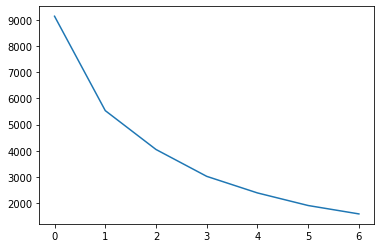

In [107]:
plt.plot(icd)

In [109]:
model2=KMeans(n_clusters=3)  # clusters ---> 3 ---> 0,1,2---> 3 groups of customers.
model2.fit(rfm_scaled)

KMeans(n_clusters=3)

In [110]:
model2.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [111]:
final_data['C_id']=model2.labels_

In [112]:
final_data.head()

,CustomerID,Amount,Frequency,diff,C_id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,7,1,1
2,12348.0,1797.24,4,74,1
3,12349.0,1757.55,1,18,1
4,12350.0,334.40,1,309,0


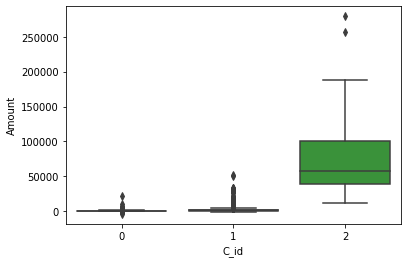

In [113]:
# Amount ----> 

sns.boxplot(x='C_id',y='Amount',data=final_data)

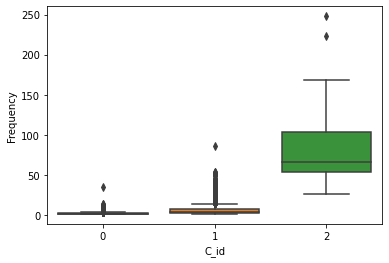

In [114]:
# Frequency:

sns.boxplot(x='C_id',y='Frequency',data=final_data)

In [ ]:
# People belonging to 2 Cluster are the most valued customer for the Retail giant.

# People belonging 1 cluster, that needs to be provided with the services or offers to increase the frequency as to impact the revenue.